In [5]:
# -*- coding: utf-8 -*-
%matplotlib inline
%load_ext autoreload
%autoreload 2

# add path
import sys
my_path = r'D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1'
sys.path.insert(0,my_path + r'\code\COMMON')

# basic imports 
import numpy as np
import matplotlib.pyplot as plt
from optimize_hyperparams import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Build dataset

In [2]:
from proj1_helpers import load_csv_data 
from outliers import handle_outliers
from standard import standardize

# load raw data
y_raw, input_data_raw, ids = load_csv_data(my_path + r'\data\train.csv', sub_sample=False)

# handle outliers
X, y = handle_outliers(input_data_raw, y_raw, -999, 'median')

# standardize
X, mean_x, std_x = standardize(X)

-999 are replaced by the median value of the feature


# Least squares backward

tested degree:  [1 2 3 4 5] 

------------------------------------------ cross validation with degree =  1
------------------------------------------ cross validation with degree =  2
------------------------------------------ cross validation with degree =  3
------------------------------------------ cross validation with degree =  4


D:\Documents\etudes\epfl\MA1\cours\MachineLearning\Project1\code\COMMON\costs.py:43: RuntimeWarning: overflow encountered in exp
  loglikelihood = np.sum(np.log(1+np.exp(tx.dot(w))) - y*(tx.dot(w))) + lambda_*w.T.dot(w)


------------------------------------------ cross validation with degree =  5
Optimal degree:  3
Associated testing loss:  5483.34179905 

tested degree:  [1 2 3 4 5] 

------------------------------------------ cross validation with degree =  1
------------------------------------------ cross validation with degree =  2
------------------------------------------ cross validation with degree =  3
------------------------------------------ cross validation with degree =  4
------------------------------------------ cross validation with degree =  5
Optimal degree:  3
Associated testing loss:  5297.52573825 

tested degree:  [1 2 3 4 5] 

------------------------------------------ cross validation with degree =  1
------------------------------------------ cross validation with degree =  2
------------------------------------------ cross validation with degree =  3
------------------------------------------ cross validation with degree =  4
------------------------------------------ cross

KeyboardInterrupt: 

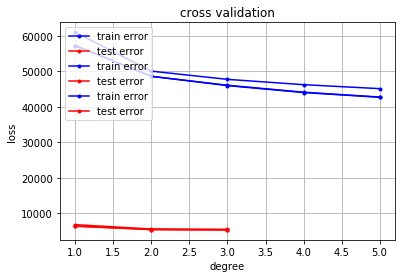

In [9]:
# initialize with all features
ind_f = range(1,30)

# store
ind_f_tot = []
loss_tot = []
degree_opt_tot = []

# ridge regression parameters
arg_ls = dict()
arg_ls['method'] = 'ls'
arg_ls['loss'] = 'loglikelihood'
arg_ls['max_iters'] = 100
arg_ls['k_fold'] = 10
arg_ls['lambda_'] = 0

# parameters
degree_min = 1
degree_max = 5
degree_steps = 1
k_fold = 5

for i in range(1,30):
    
    # regression with 30-i features
    loss_te_i = float('inf')
    degree_opt_i = np.empty((1,))
    ind_f_i = np.empty((1,30-i))
    
    for j in range(1,30-i):
        
        # remove feature j
        ind_f_j = np.delete(ind_f, j)

        # fit  
        w_opt_j, loss_tr_j, loss_te_j, degree_opt_j = optimize_degree(y, X[:,ind_f_j], degree_min, degree_max, degree_steps, arg_ls, debug_mode=1)
        
        # compare  
        if loss_te_j < loss_te_i:
            loss_te_i = loss_te_j
            degree_opt_i = degree_opt_j
            ind_f_i = ind_f_j

    # store 
    ind_f_tot.append(ind_f_i)
    loss_tot.append(loss_te_i)
    degree_opt_tot.append(degree_opt_i)

# results
plt.figure